In [53]:
import numpy as np

import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digits = load_digits()

In [54]:
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape" , digits.data.shape)

# Print to show there are 1797 labels (integers from 0-9)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


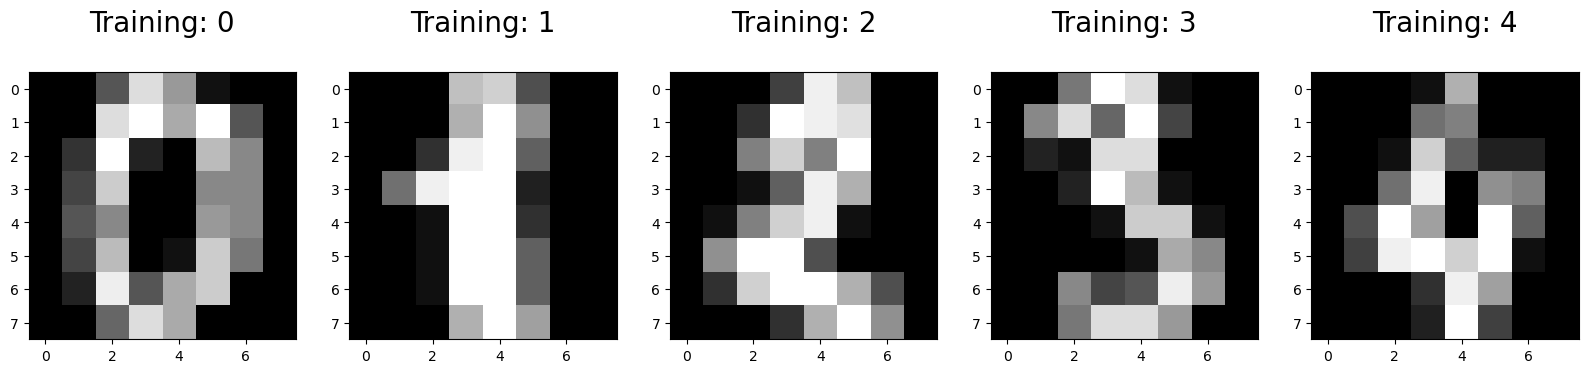

In [55]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

*[I didn't change above blocks as came along with the notebook as the MNIST dataset wasn't in my dropbox. Hope this won't be an issue. Thanks]*

We perform our task as below:

In [56]:
# First importing our necessary libraries for the task:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from skimage import exposure

In [57]:
# Loading the MNIST dataset
mnist = load_digits()
X, y = mnist.data, mnist.target

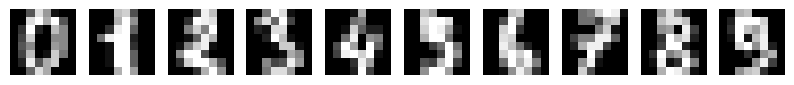

In [58]:
# Showing the first 10 images
fig, ax = plt.subplots(1, 10, figsize=(10, 1))
for i in range(10):
    ax[i].imshow(X[i].reshape(8, 8), cmap='gray')
    ax[i].axis('off')
plt.show()

In [59]:
# Making our dataframe as needed:
df = pd.DataFrame(data= np.c_[mnist['data'], mnist['target']])
df.columns = list(range(64)) + ['target']
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4.0


In [60]:
# Reshaping our images to 2D arrays
X = X.reshape(-1, 8, 8)

The `-1` is a placeholder that tells NumPy to automatically calculate the size of the first dimension based on the total number of elements in the array and the specified sizes of the other dimensions.

In [61]:
# Now defining percentile values for our contrast stretching:
p2, p98 = np.percentile(X, (2, 98))
p2, p98

(0.0, 16.0)

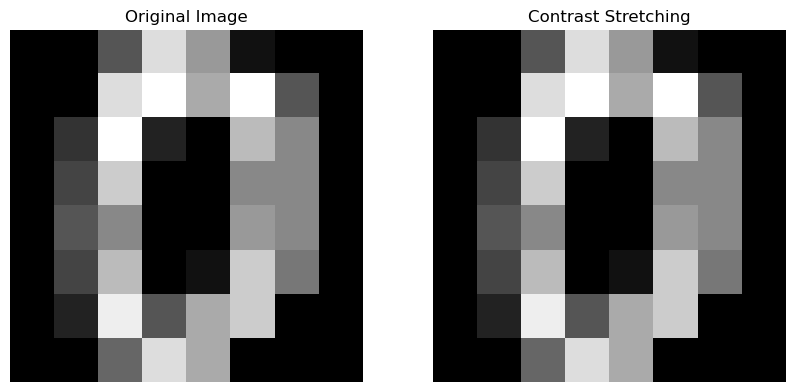

In [62]:
# Showing the first image with and without contrast stretching
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(X[0], cmap='gray')
ax[0].axis('off')
ax[0].set_title('Original Image')
ax[1].imshow(exposure.rescale_intensity(X[0], in_range=(p2, p98)), cmap='gray')
ax[1].axis('off')
ax[1].set_title('Contrast Stretching')
plt.show()

Now we perform our data preprocessing before our Train Test split:

In [63]:
# Preprocessing the images
X_preprocessed = []
for image in X:
    # Apply contrast stretching
    p2, p98 = np.percentile(image, (2, 98))
    img_rescale = exposure.rescale_intensity(image, in_range=(p2, p98))
    
    # Flatten the preprocessed image
    img_flat = img_rescale.flatten()
    X_preprocessed.append(img_flat)

In [64]:
X_preprocessed = np.array(X_preprocessed)

Now we Split our dataset into Training and Testing sets for RandomForrest classifier later. For our purpose of the dataset we split train test into 80, 20 split i.e. the 80% of our data is for training data with 20% test data as below: 

In [65]:
# Splitting the dataset into training and testing sets with fixed random seed 42
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

Using the RandomForestClassifier built into scikit-learn to create our classification model as per instruction:

In [66]:
# Creating our Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

In [67]:
# Now Training our Classifier
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [68]:
# Making our predictions on the test set
y_pred = rf_classifier.predict(X_test)

In [69]:
# Evaluating our classifier's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
# print(f"Precision: {precision_score(y_test, y_pred, average='macro'):.4f}")
# print(f"Recall: {recall_score(y_test, y_pred, average='macro'):.4f}")
# print(f"F1-score: {f1_score(y_test, y_pred, average='macro'):.4f}")

Now we perform Hyperparameter tuning as below for optimizing our model's performance, finding the right combination of hyperparameter values that strike a balance between model complexity and generalization ability.

In [25]:
# Performing hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

*"[It took two minutes to run the tuning for my 8GB RAM GPU laptop with 3 glitching noise during the process so I won't take any risk for further tuning untill I finish the bootcamp as I already had issues at the begining with my laptop back in March. Thanks for your understanding.]"*

We use the parameters in our hyperparameter tuning with GridSearchCV as:

n_estimators (100, 200, 300): for the number of trees in the forest. Increasing to different number of trees to improve the model's performance but it increases our computational cost as well.
max_depth (None, 10, 20): for our maximum depth of each tree. A deeper tree to model more complex patterns but may lead to overfitting.
min_samples_split (2, 5, 10): for our minimum number of samples required to split an internal node. Higher values prevent creating nodes representing too few samples, addressing overfitting issue.

We use GridSearchCV here to systematically work through multiple combinations of parameter tunes, cross-validating as it goes to determine which tune gives the best performance. The cv=5 parameter specifies a 5-fold cross-validation meaning the dataset is split into 5 parts, the model is trained on 4 and validated on the 1 remaining part, and this process is repeated 5 times. Then our model fit runs the grid search on the training data (X_train, y_train) to find our best parameters.

In [27]:
# Now Training our classifier with the best parameters
best_rf_classifier = grid_search.best_estimator_
best_rf_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=300, random_state=42)

Our model's best parameters as max_depth 10 with n_estimators 300 (fixed random state rseed at 42)

In [28]:
# Now making predictions using our best classifier
y_pred_best = best_rf_classifier.predict(X_test)

In [ ]:
Print the confusion matrix for your Random Forest model on the test set.

In [29]:
# Evaluating the performance of the best classifier again after tuning:
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best, average='weighted')
recall_best = recall_score(y_test, y_pred_best, average='weighted')
f1_best = f1_score(y_test, y_pred_best, average='weighted')

In [30]:
# Creating a dictionary of metrics for that:
metrics = {'Random Forest Classifier': [accuracy, precision, recall, f1]}

# Creating a DataFrame from the dictionary
df = pd.DataFrame(metrics, index=['Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Prining the DataFrame as confusion metric
print(df)

           Random Forest Classifier
Accuracy                   0.980556
Precision                  0.980826
Recall                     0.980556
F1 Score                   0.980573


Here our Accuracy, Precission, Recall and F1 Scores all are above 98% clearly showing strong performance.

Below our confusion matrix provided in a tabular summary of the model's predictions compared to the true labels:

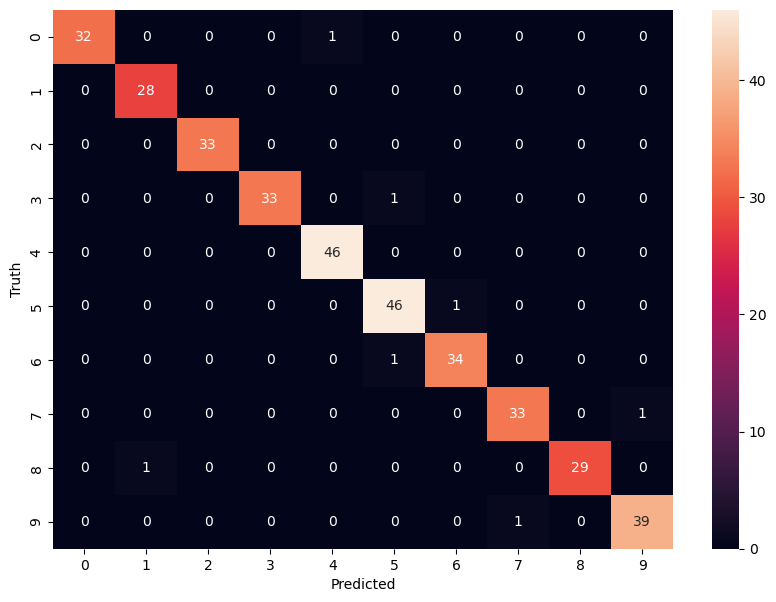

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [34]:
# Reporting on our classification:
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       1.00      0.97      0.99        34
           4       0.98      1.00      0.99        46
           5       0.96      0.98      0.97        47
           6       0.97      0.97      0.97        35
           7       0.97      0.97      0.97        34
           8       1.00      0.97      0.98        30
           9       0.97      0.97      0.97        40

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



Report: As report shows no struggles in any clasees, our model fits well. As the model achieves high accuracy on both the training and validation sets, it indicates a good fit and we can proceed with evaluating the model on the test set to assess its final performance.

Now we perform visualisation on samples and their predicted labels as below:

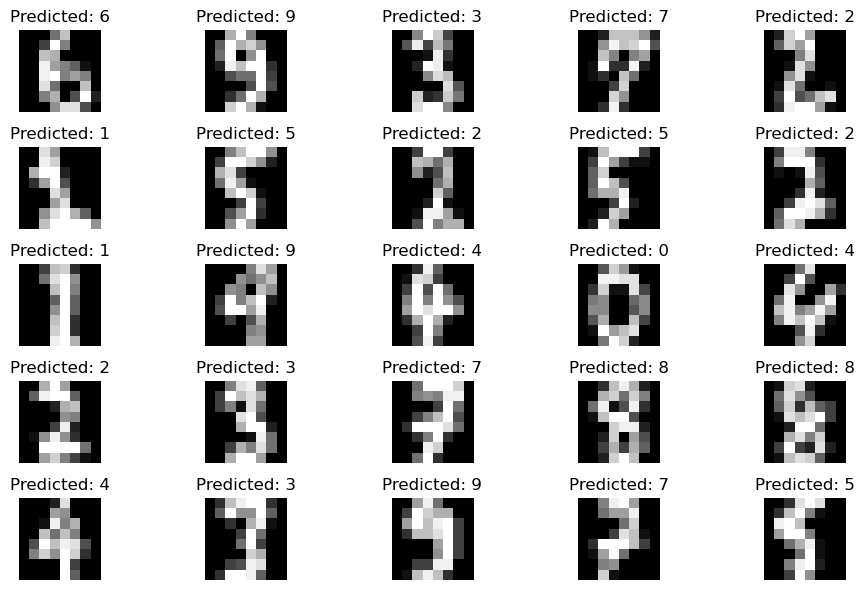

In [31]:
# Visualising some sample images and their predicted labels
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(10, 6))
for i, ax in enumerate(axes.flatten()):
    image = X_test[i].reshape(8, 8)
    predicted_label = y_pred_best[i]
    ax.imshow(image, cmap='gray')
    ax.set_title(f"Predicted: {predicted_label}")
    ax.axis('off')
plt.tight_layout()
plt.show()

As we can see our model perfectly predited the labels in almost all cases here. 

We can conclude our model fits well on this dataset. 